In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('E-commerce Customer Behavior.csv')


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [93]:
# Data preprocessing
df.dropna(subset=["Satisfaction Level"], inplace=True)

In [ ]:
# Convert categorical variables to numerical
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df = pd.get_dummies(df, columns=["City", "Membership Type", "Satisfaction Level"], drop_first=False)

In [ ]:

# Drop unnecessary columns: which are not required for training the model
df.drop(columns=["Customer ID"], inplace=True)

In [ ]:
# Scale the data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

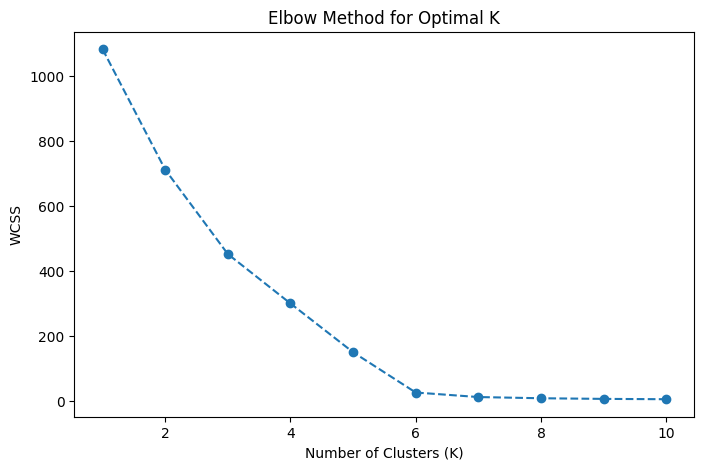

In [118]:
# Finding optimal clusters using the elbow method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

In [119]:
# Train K-Means model with optimal K
optimal_k = 4  # Based on elbow method
model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled["Cluster"] = model.fit_predict(df_scaled)

# Save the trained model
joblib.dump(model, 'customer_segmentation.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [120]:
# Assign customer segments
cluster_labels = {
    0: "Casual Buyers",
    1: "High Spenders",
    2: "Frequent Shoppers",
    3: "Infrequent Buyers"
}

df_scaled['Customer Segment'] = df_scaled['Cluster'].map(cluster_labels)

# Display first few rows with assigned segments
print(df_scaled[['Cluster', 'Customer Segment']].head())

   Cluster   Customer Segment
0        1      High Spenders
1        2  Frequent Shoppers
2        0      Casual Buyers
3        1      High Spenders
4        3  Infrequent Buyers


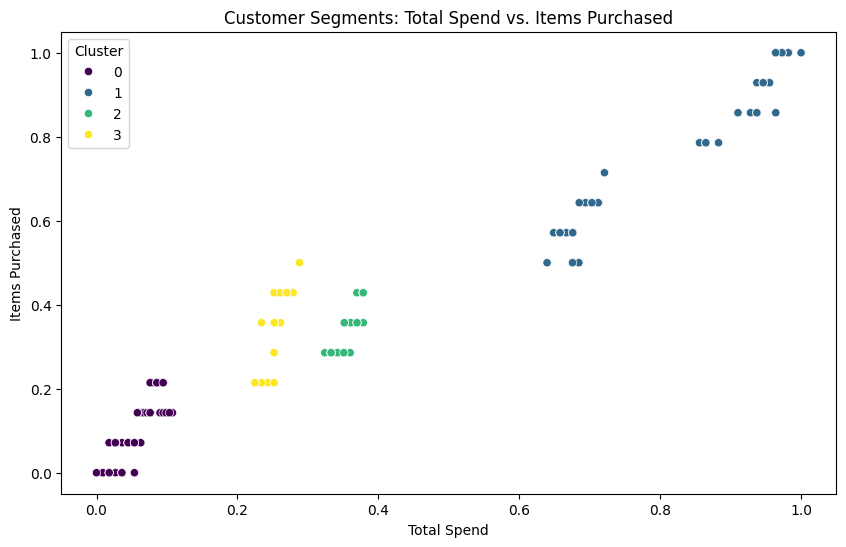

In [128]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['Total Spend'], y=df_scaled['Items Purchased'], hue=df_scaled['Cluster'], palette='viridis')
plt.title("Customer Segments: Total Spend vs. Items Purchased")
plt.xlabel("Total Spend")
plt.ylabel("Items Purchased")
plt.legend(title="Cluster")
plt.show()


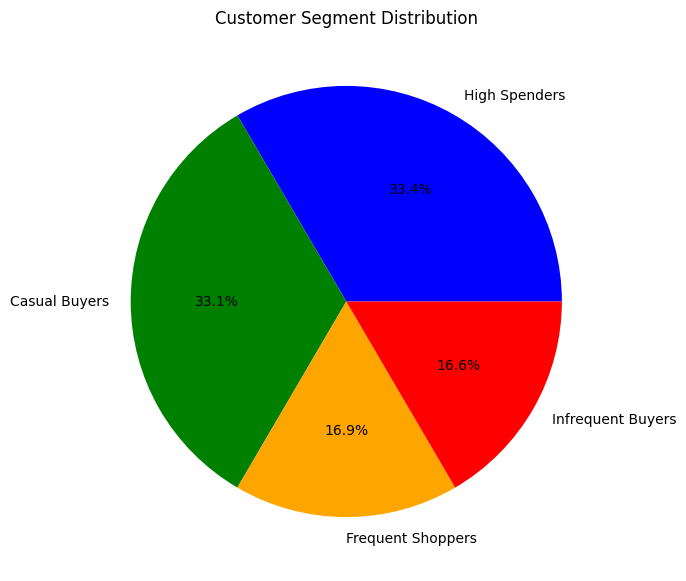

In [123]:
plt.figure(figsize=(7, 7))
df_scaled['Customer Segment'].value_counts().plot.pie(autopct="%1.1f%%", colors=["blue", "green", "orange", "red"])
plt.title("Customer Segment Distribution")
plt.ylabel("")  # Hide y-axis label
plt.show()


/tmp/ipykernel_9018/3517744308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer Segment', y='Total Spend', data=df_scaled, palette="Set2")


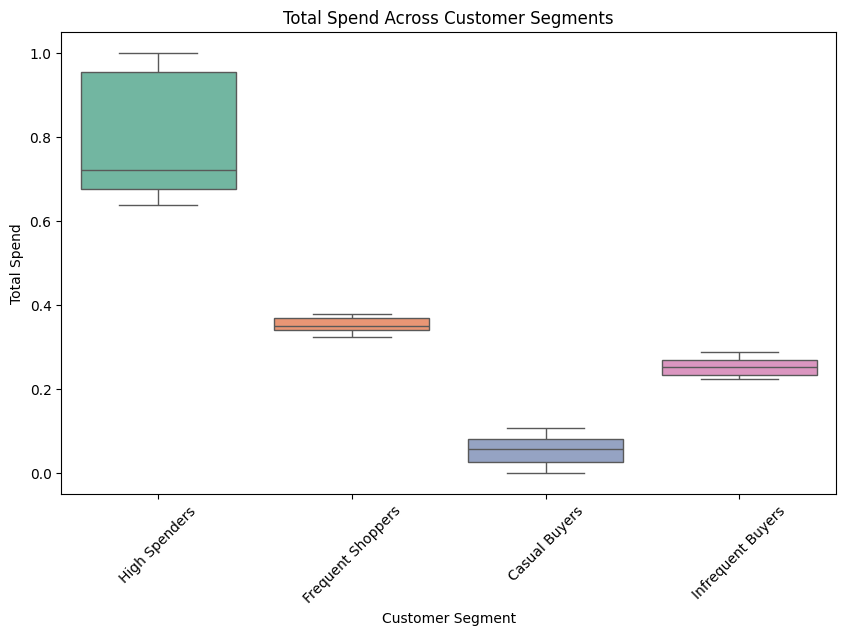

In [124]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer Segment', y='Total Spend', data=df_scaled, palette="Set2")
plt.xticks(rotation=45)
plt.title("Total Spend Across Customer Segments")
plt.show()
